# Predicting Medical Insurance Charges


Predicting medical insurance charges using regression techniques. We'll use a real-world dataset and apply machine learning models, perform cross-validation, analyze feature importance, and tune hyperparameters for optimal performance.


##1: Import Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, r2_score

import warnings
warnings.filterwarnings("ignore")


##2: Load the Dataset

I'm using a publicly available insurance dataset containing demographic and health information of individuals along with the insurance charges they incurred.


In [4]:
df = pd.read_csv("insuranceDataset.csv")
df.head()


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


##3: Exploratory Data Analysis (EDA)

Explore the dataset to understand the distribution of features and the relationship between variables, especially the target variable `charges`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
print(df.describe())


             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


In [7]:
 df.drop("index", axis=1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [9]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

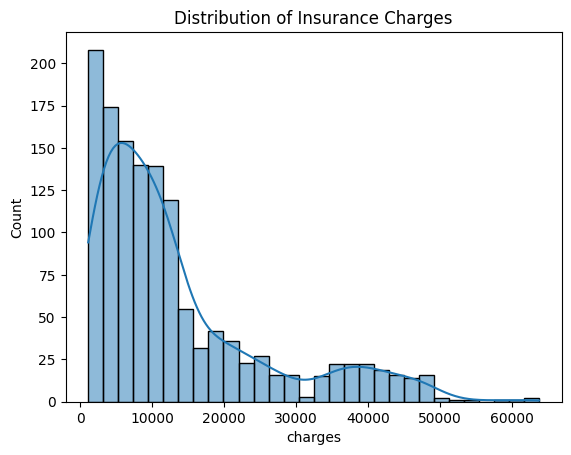

In [12]:


sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()



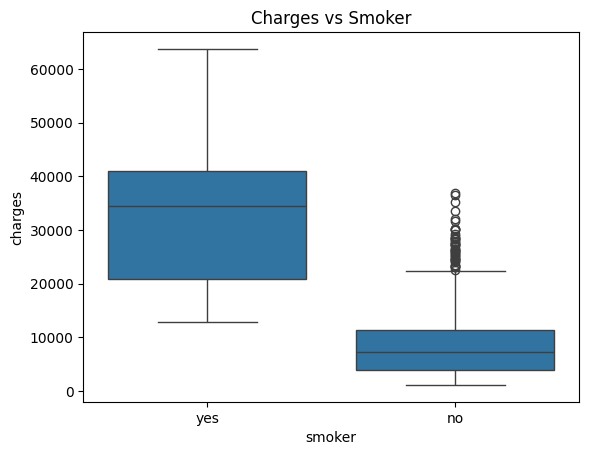

In [13]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoker")
plt.show()



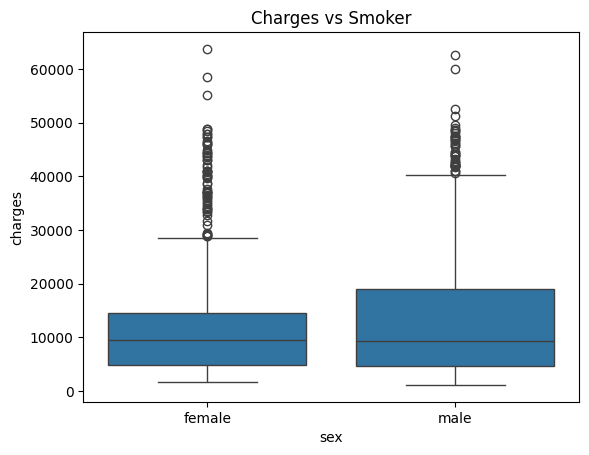

In [14]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges vs Smoker")
plt.show()


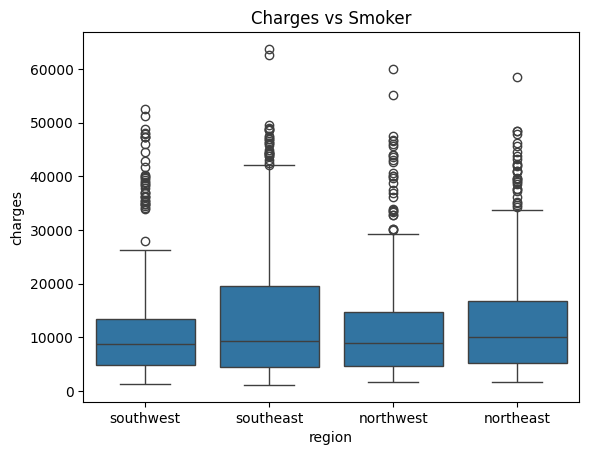

In [15]:
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges vs Smoker")
plt.show()


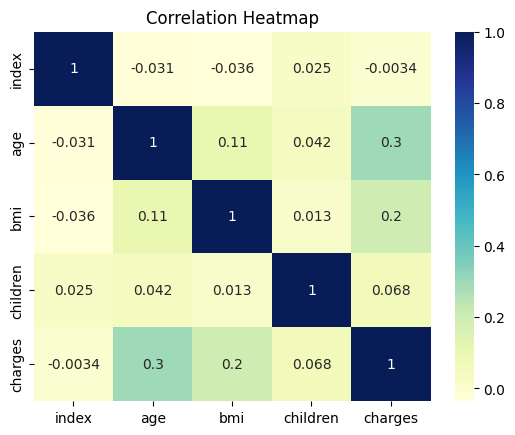

In [17]:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

##4: Data Preprocessing

We need to preprocess the data before feeding it into machine learning models. This includes scaling numeric values and encoding categorical variables.



In [19]:
X = df.drop("charges", axis=1)
y = df["charges"]

cat_cols = ["sex", "smoker", "region"]
num_cols = ["age", "bmi", "children"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first'), cat_cols)
])


##5: Train-Test Split

Split the dataset into training and testing sets to evaluate how well the model generalizes to unseen data.



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6: Model and Evaluate
Model training and evaluation on the test set using common regression metrics.


Firstly I will see which model fits the best, after that I will choose the best model for completeing this project.

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("regressor", model)
    ])
     # Get cross-validated predictions
    y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=5)

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
    mae = mean_absolute_error(y_train, y_pred_cv)
    r2 = r2_score(y_train, y_pred_cv)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }

# Sort by RMSE
sorted_results = dict(sorted(results.items(), key=lambda x: x[1]["RMSE"]))

# Print results
print("Model Comparison (Mean CV Metrics):")
for model, metrics in sorted_results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}, R² = {metrics['R²']:.4f}")

Model Comparison (Mean CV Metrics):
Gradient Boosting: RMSE = 4746.29, MAE = 2674.02, R² = 0.8439
Random Forest: RMSE = 5022.02, MAE = 2838.65, R² = 0.8253
Ridge: RMSE = 6159.96, MAE = 4256.23, R² = 0.7371
Lasso: RMSE = 6159.98, MAE = 4245.11, R² = 0.7371
Linear Regression: RMSE = 6160.19, MAE = 4245.23, R² = 0.7371
Decision Tree: RMSE = 6746.72, MAE = 3315.36, R² = 0.6846
KNN: RMSE = 6850.40, MAE = 4192.79, R² = 0.6749


GBM is performing well with lowest RMSE and MAE. It also has highest R² as compared to other models.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# Train model
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

##Evaluate with Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cross-validation predictions
y_pred_cv = cross_val_predict(gb_pipeline, X_train, y_train, cv=5)

# Metrics
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
mae = mean_absolute_error(y_train, y_pred_cv)
r2 = r2_score(y_train, y_pred_cv)

print("Cross-Validation Results (Training Set):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


Cross-Validation Results (Training Set):
RMSE: 4736.64
MAE: 2668.35
R²: 0.8446


##Evaluate on Test Set

In [32]:
# Predict on test set
y_test_pred = gb_pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Results:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.4f}")


Test Set Results:
RMSE: 4329.57
MAE: 2443.48
R²: 0.8793


###Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

# Use best estimator for final predictions
best_model = grid_search.best_estimator_


Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best CV RMSE: 4610.400054682051


### Evaluate the tuned model on the test set

In [34]:
# Predict on test set using the best model
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Performance of Tuned Model:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R²: {r2_test:.4f}")


Test Set Performance of Tuned Model:
RMSE: 4294.46
MAE: 2473.41
R²: 0.8812


Visulaizing actual vs predicted using tunned model

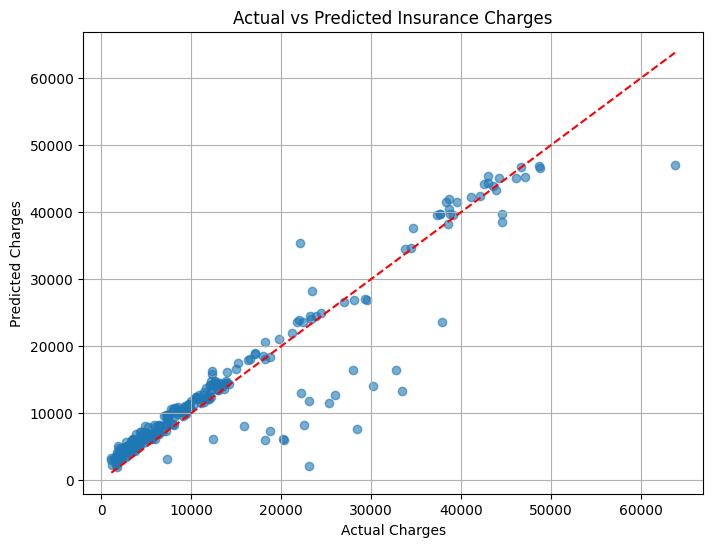

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.grid(True)
plt.show()


###Saving this model

In [40]:
import pickle

with open("gbm_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as gbm_model.pkl")


✅ Model saved as gbm_model.pkl


In [37]:
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [38]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.4 MB/s eta 0:00:00
